In [ ]:
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# input_1 (InputLayer)         (None, 1, 28, 28)         0         
# _________________________________________________________________
# batch_normalization_1 (Batch (None, 1, 28, 28)         112       
# _________________________________________________________________
# conv2d_1 (Conv2D)            (None, 64, 24, 24)        1664      
# _________________________________________________________________
# max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
# _________________________________________________________________
# conv2d_2 (Conv2D)            (None, 128, 8, 8)         204928    
# _________________________________________________________________
# max_pooling2d_2 (MaxPooling2 (None, 128, 4, 4)         0         
# _________________________________________________________________
# flatten_1 (Flatten)          (None, 2048)              0         
# _________________________________________________________________
# dense_1 (Dense)              (None, 256)               524544    
# _________________________________________________________________
# dropout_1 (Dropout)          (None, 256)               0         
# _________________________________________________________________
# dense_2 (Dense)              (None, 128)               32896     
# _________________________________________________________________
# dropout_2 (Dropout)          (None, 128)               0         
# _________________________________________________________________
# dense_3 (Dense)              (None, 10)                1290      
# =================================================================

In [1]:
# import essentials
import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
# load data locally
# you may want to check out loading data directly from keras
# https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
# build a dictionary for easy access to object classes
objects = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

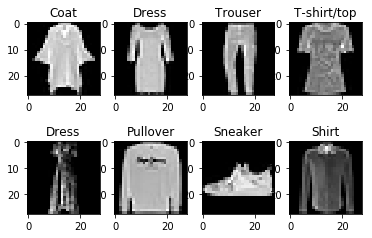

In [4]:
# let's have a quick look of those images
f, axes = plt.subplots(2, 4)
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = np.array(train_data.iloc[index, 1:]).reshape((28, 28))
        obj = train_data.iloc[index, 0]
        axe.imshow(img, cmap='gray')
        axe.set_title(objects[obj])

In [5]:
# separate the training data into images and labels
images = train_data.iloc[:, 1:]
labels = train_data.iloc[:, 0]

In [6]:
# reshape the images to fit CNNs
labels = labels.as_matrix()
images = images.as_matrix().reshape(images.shape[0], 1, 28, 28)

In [7]:
# one-hot encoding for labels
labels = np_utils.to_categorical(labels)

In [8]:
# divide data into training and validation set
train_features, vali_features, train_labels, vali_labels = train_test_split(images, labels, 
                                                                           test_size=0.15, random_state=200)

In [9]:
# check data shapes
print('train_features shape: ', train_features.shape)
print('vali_features shape: ', vali_features.shape)
print('train_labels shape: ', train_labels.shape)
print('vali_labels shape: ', vali_labels.shape)

train_features shape:  (51000, 1, 28, 28)
vali_features shape:  (9000, 1, 28, 28)
train_labels shape:  (51000, 10)
vali_labels shape:  (9000, 10)


In [23]:
# hyperparameters
epochs = 30
batch_size = 256

# build model
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))

# normalization
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu',
          bias_initializer='RandomNormal', kernel_initializer='random_uniform'))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.35))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.35))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [24]:
from keras.optimizers import Adam
opt = Adam(decay=0.001)

In [25]:
# compile the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 28, 28)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 512, 8, 8)         819712    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 512, 4, 4)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
__________

In [27]:
# training
import time
start_time = time.time()

training = model.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)
training_time = time.time() - start_time

Train on 51000 samples, validate on 9000 samples
Epoch 1/30
51000/51000 [==============================] - 25s - loss: 0.7554 - acc: 0.7336 - val_loss: 0.3804 - val_acc: 0.8639
Epoch 2/30
51000/51000 [==============================] - 24s - loss: 0.4353 - acc: 0.8511 - val_loss: 0.3099 - val_acc: 0.8904
Epoch 3/30
51000/51000 [==============================] - 24s - loss: 0.3608 - acc: 0.8767 - val_loss: 0.2810 - val_acc: 0.8993
Epoch 4/30
51000/51000 [==============================] - 24s - loss: 0.3156 - acc: 0.8936 - val_loss: 0.2528 - val_acc: 0.9077
Epoch 5/30
51000/51000 [==============================] - 24s - loss: 0.2816 - acc: 0.9036 - val_loss: 0.2407 - val_acc: 0.9133
Epoch 6/30
51000/51000 [==============================] - 24s - loss: 0.2525 - acc: 0.9128 - val_loss: 0.2289 - val_acc: 0.9209
Epoch 7/30
51000/51000 [==============================] - 24s - loss: 0.2293 - acc: 0.9200 - val_loss: 0.2241 - val_acc: 0.9220
Epoch 8/30
51000/51000 [==============================]

Training 30 epochs in 12:11.4


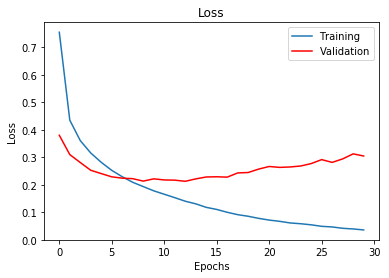

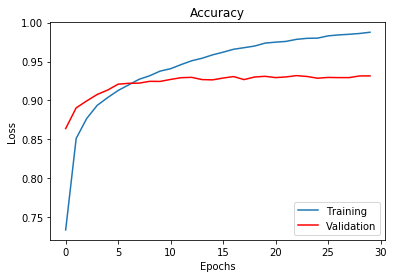

In [28]:
mm = training_time // 60
ss = training_time % 60
print('Training {} epochs in {}:{}'.format(epochs, int(mm), round(ss, 1)))

# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [29]:
test_images = test_data.iloc[:, 1:]
test_labels = test_data.iloc[:, 0]
test_labels = test_labels.as_matrix()
test_features = test_images.as_matrix().reshape(test_images.shape[0], 1, 28, 28)

In [30]:
from sklearn.metrics import accuracy_score
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [31]:
accuracy_score(test_labels, pred_digits)

0.93230000000000002

# original MNIST

In [32]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11460608/11490434 [============================>.] - ETA: 0s

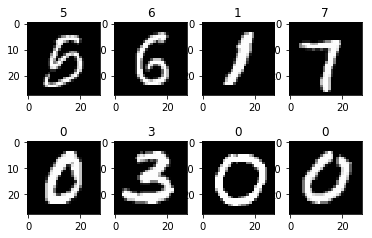

In [33]:
f, axes = plt.subplots(2, 4)
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = x_train[index]
        obj = y_train[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(obj)

In [35]:
train_features = x_train.reshape((x_train.shape[0], 1, 28, 28))
test_features = x_test.reshape((x_test.shape[0], 1, 28, 28))

In [36]:
train_labels = np_utils.to_categorical(y_train)

# divide data into training and validation set
train_features, vali_features, train_labels, vali_labels = train_test_split(train_features, train_labels, 
                                                                           test_size=0.15, random_state=80)

In [37]:
# hyperparameters
epochs = 30
batch_size = 256

# build model2
n_classes = 10
model2 = Sequential()


# input layer
model2.add(InputLayer(input_shape=(1, 28, 28)))

# normalization
model2.add(BatchNormalization())

model2.add(Conv2D(64, (5, 5), activation='relu',
          bias_initializer='RandomNormal', kernel_initializer='random_uniform'))


model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(512, (5, 5), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))

model2.add(Dropout(0.35))

model2.add(Dense(64, activation='relu'))

model2.add(Dropout(0.35))

model2.add(Dense(n_classes, activation='softmax'))

In [38]:
opt = Adam(decay=0.001)
# compile the model
model2.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
training2 = model2.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/30
51000/51000 [==============================] - 24s - loss: 0.3541 - acc: 0.8907 - val_loss: 0.0734 - val_acc: 0.9794
Epoch 2/30
51000/51000 [==============================] - 24s - loss: 0.0910 - acc: 0.9757 - val_loss: 0.0436 - val_acc: 0.9872
Epoch 3/30
51000/51000 [==============================] - 24s - loss: 0.0623 - acc: 0.9838 - val_loss: 0.0435 - val_acc: 0.9878
Epoch 4/30
51000/51000 [==============================] - 24s - loss: 0.0468 - acc: 0.9871 - val_loss: 0.0331 - val_acc: 0.9901
Epoch 5/30
51000/51000 [==============================] - 24s - loss: 0.0383 - acc: 0.9902 - val_loss: 0.0301 - val_acc: 0.9916
Epoch 6/30
51000/51000 [==============================] - 24s - loss: 0.0264 - acc: 0.9925 - val_loss: 0.0340 - val_acc: 0.9916
Epoch 7/30
51000/51000 [==============================] - 24s - loss: 0.0238 - acc: 0.9935 - val_loss: 0.0294 - val_acc: 0.9923
Epoch 8/30
51000/51000 [==============================]

Training 30 epochs in 12:11.4


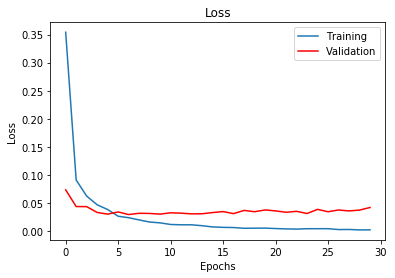

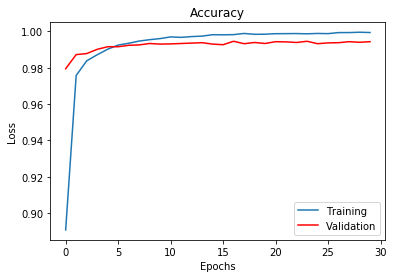

In [40]:
mm = training_time // 60
ss = training_time % 60
print('Training {} epochs in {}:{}'.format(epochs, int(mm), round(ss, 1)))

# show the loss and accuracy
loss = training2.history['loss']
val_loss = training2.history['val_loss']
acc = training2.history['acc']
val_acc = training2.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [42]:
test_labels = y_test
pred = model2.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [43]:
accuracy_score(test_labels, pred_digits)

0.99419999999999997